##### Project Scribble
Project: Porfolio Optimization

#### Completed
- Implemented Pearson's Corelation Coefficient function
- Created dataset with all features (x values) raised to their coefficient value
- Implemented multiple linear regression
- Split data into training and testing sets
- Train model
- Evaluate model

#### What's Next
- Make predictions for **actual** future stock
- Clean up code so that it works for other stock datasets
- Maybe pick different datasets?

In [52]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This line is for displaying our graphs in Jupyter
%matplotlib inline
sns.set()

### Functions
- Pearson's Corelation Coefficient
- Multiple Linear Regression
- Mean Squared Error
- Outlier Remover function (not implemented, thinking about it)

In [53]:
# Pearson's Corelation Coefficient function

# Input:
## dataframe: The dataframe where the data is stored
## x_column: The name of the x column we want to measure
## y_column: The name of the y column we want to measure

# Output:
## r = the Pearson's Corelation Coefficient

def PCC(dataframe: pd, features: list, target: str):
    y_values = dataframe[target].to_numpy()
    y_mean = y_values.mean()
    
    for column in features:
        x_values = dataframe[column].to_numpy()
        x_mean = x_values.mean()
        numerator = sum((x_values - x_mean) * (y_values- y_mean))
        denominator = np.sqrt(sum((x_values - x_mean)**2) * sum((y_values - y_mean)**2))
        
        r = numerator / denominator
        
        dataframe[column] = dataframe[column] ** r

    
    return dataframe

In [54]:
def MSE(y_pred_values, y_values, data_length):
    
    sum_error = sum((y_pred_values - y_values) ** 2)
    
    cost = (1 / data_length) * sum_error
    
    return cost

In [55]:
# Multiple Linear Regression function

# Inputs:
## dataframe: The dataframe where the data is stored
## x_column: The name of the x column we want to measure
## y_column: The name of the y column we want to measure
## weight: The slope you want to start calculating the gradient descent with (default weight = 0)
## bias: The y-intercept you want to start calculating the gradient descent with (default bias = 0)
## rate: The rate you want the gradien descent to adjust by (default rate = 0.0001)
## epochs: How many times do we adjusy the gradient descent (default epochs = 1000)

# Outputs:
# A tuple that includes the new weight and new bias (slope and y-intercept)

def LinearRegression(dataframe: pd, 
                     features: list,
                     target: str,
                     rate = 0.00001,
                     epochs = 1000
                    ):
    
    # x_values contains the values of the entire column of "x_column"
    # y_values contains the values of the entire column of "y_column"
    x_values = dataframe[features]
    y_values = dataframe[target]
    
    
    # Just getting the full length of the dataframe
    total_rows = len(dataframe)
    total_columns = len(features)
    
    # Setting up weight and bias
    weights = np.zeros(total_columns)
    bias = 0
    
    # MSE array that will keep the last cost error (just one value)
    mse_array = []
    
    
    # Gradient descent portion
    for i in range(epochs):
        # pred_y_values is a new column, where the m'x+b' formula has been applied
        # Every row in pred_y_values has the formula applied
        pred_y_values = np.dot(x_values, weights) + bias
        
        # Obtaining the partial derivatives of the weight and bias
        der_weight = (1 / total_rows) * (2 * np.dot(x_values.T, (pred_y_values - y_values)))
        der_bias = (1 / total_rows) * (2 * np.sum(pred_y_values - y_values))
        
        # Calculating the new_weight and new bias
        new_weights = weights - rate * der_weight
        new_bias = bias - rate * der_bias
        
        # Helps prevent infinite values by stopping if MSE increased
        if mse_array == []:
            mse_array.append(MSE(pred_y_values, y_values, total_rows))
        else:
            mse = MSE(pred_y_values, y_values, total_rows)
            if mse > mse_array[0]:
                return (weights, bias)
            else:
                mse_array[0] = mse
                weights = new_weights
                bias = new_bias
        
    return (weights, bias)

In [56]:
def predict(dataframe: pd, features: list, weights: list, bias: int):
    x_values = dataframe[features].to_numpy()
    dataframe["Prediction"] = np.dot(x_values, weights) + bias
    return dataframe


____
### Inspect and explore data

In [57]:
# Creating a dataframe with AMC stock data
amc_df = pd.read_csv("stock data/AMC.csv")
amc_df['index'] = amc_df.index

# Taking a peak at the first 5 rows of our table
amc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,index
0,2020-04-16,2.35,2.49,2.15,2.44,2.44,6290800,0
1,2020-04-17,3.85,3.85,3.05,3.20,3.20,26799900,1
2,2020-04-20,3.22,3.44,3.06,3.18,3.18,10787200,2
3,2020-04-21,3.20,3.38,3.15,3.25,3.25,5788400,3
4,2020-04-22,3.39,3.39,3.16,3.18,3.18,4568600,4


In [58]:
# Checking if the Date column is a "datetime" object 
amc_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
index          int64
dtype: object

In [59]:
# It is not, so we convert it to one
amc_df['Date'] = pd.to_datetime(amc_df['Date'])
amc_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
index                 int64
dtype: object

In [60]:
# Get last 50 days
amc_df = amc_df[-50:]

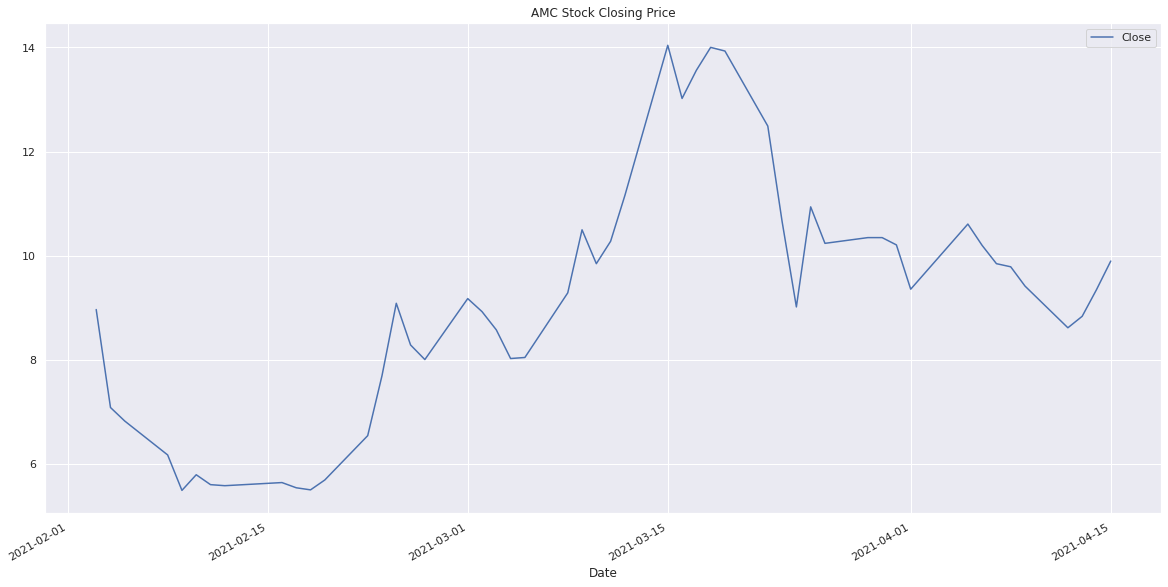

In [61]:
# Plotting Closing Price
amc_df.plot(x="Date",
            y="Close",
            figsize=(20,10),
            title = "AMC Stock Closing Price"
           )
plt.show()

_______
### Method 1
- Using Open, High, Low, and Volume as features

In [62]:
modified_df = amc_df.copy()

In [63]:
# Declaring our features and target
features = ["Open", "High", "Low", "Volume"]
target = "Close" # Y value

In [64]:
modified_df = PCC(modified_df, features, target)

In [65]:
modified_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,index
202,2021-02-03,7.710042,9.094811,7.495427,8.97,8.97,2.342134,202
203,2021-02-04,7.587561,8.164520,6.669733,7.09,7.09,2.310571,203
204,2021-02-05,6.330157,7.738895,6.223350,6.83,6.83,2.329139,204
205,2021-02-08,6.090006,6.484608,5.505542,6.18,6.18,2.286111,205
206,2021-02-09,5.198142,5.497522,5.047528,5.50,5.50,2.263678,206


In [66]:
# Using last 10 for testing
train = modified_df[:-10]
test = modified_df[-10:]

In [67]:
weights, bias = LinearRegression(train, features, target)

In [68]:
test = predict(test, features, weights, bias)

<ipython-input-56-500e49907663>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Prediction"] = np.dot(x_values, weights) + bias


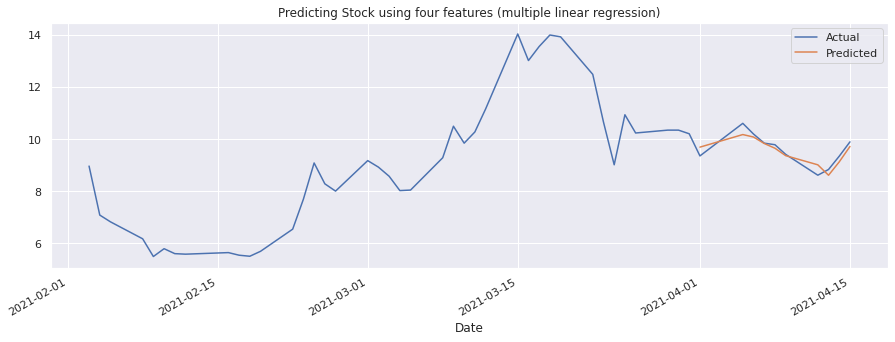

In [69]:
ax = modified_df.plot(title="Predicting Stock using four features (multiple linear regression)", x="Date", y="Close",figsize=(15,5))
test.plot(ax=ax, x="Date", y="Prediction")

plt.legend(labels=['Actual', 'Predicted'])

### Problem:
- Cannot forcast stocks beyond date if I don't have Open, Low, High, Volume info
- CAN forcast only today's Close number if we scrape data from Yahoo for current Open, Low, High and Volume info

____
### Method 2:
- Using only date number (index) as our feature

In [70]:
modified_df = amc_df.copy()

In [71]:
# Declaring our features and target
features = ["index"]
target = "Close" # Y value

In [72]:
# modified_df = PCC(modified_df, features, target)

In [73]:
# Using last 10 for testing
train = modified_df[:-10]
test = modified_df[-10:]

In [74]:
weights, bias = LinearRegression(train, features, target)

In [75]:
test = predict(test, features, weights, bias)

<ipython-input-56-500e49907663>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Prediction"] = np.dot(x_values, weights) + bias


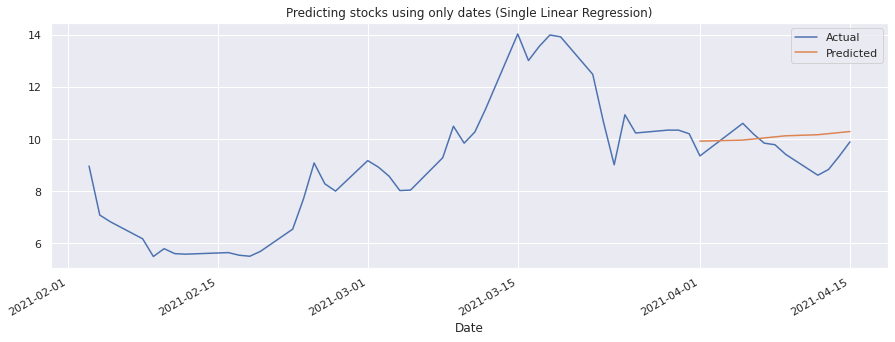

In [76]:
ax = modified_df.plot(title="Predicting stocks using only dates (Single Linear Regression)", x="Date", y="Close", figsize=(15,5))
test.plot(ax=ax, x="Date", y="Prediction")

plt.legend(labels=['Actual', 'Predicted'])

### Problem:
- Line is completely off (understandable, since it is a linear model)
- Able to predict as much into the future as I like, but will very likely be incorrect
- Suitable for stocks that have a linear trend

_____
### Method 3:
- Use scraped data from yahoo finance to predict the closing value for the day

In [77]:
modified_df = amc_df.copy()

In [78]:
# Declaring our features and target
features = ["Open", "High", "Low"]
target = "Close" # Y value

In [79]:
modified_df = PCC(modified_df, features, target)

In [80]:
# Using last 10 for testing
train = modified_df[:-10]
test = modified_df[-10:]

In [81]:
weights, bias = LinearRegression(train, features, target)

In [82]:
test = predict(test, features, weights, bias)

<ipython-input-56-500e49907663>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Prediction"] = np.dot(x_values, weights) + bias


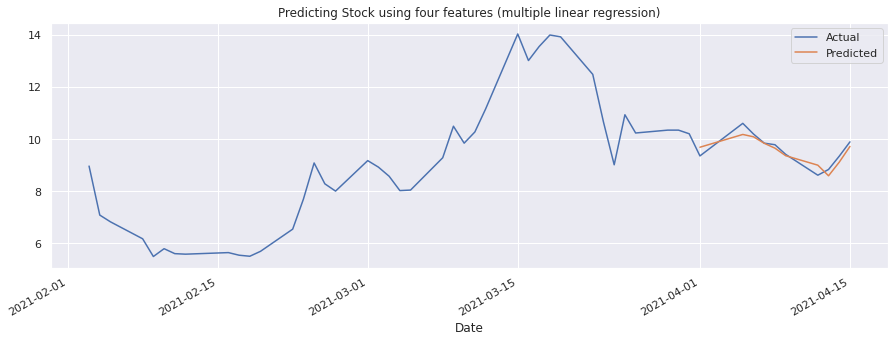

In [83]:
ax = modified_df.plot(title="Predicting Stock using four features (multiple linear regression)", x="Date", y="Close",figsize=(15,5))
test.plot(ax=ax, x="Date", y="Prediction")

plt.legend(labels=['Actual', 'Predicted'])

### Problem
- Not sure if this counts as porfolio optitmization
- Different from group's plan

### What to Do?
- Get stocks with linear trends
- Somehow get better featues to predict